<a href="https://colab.research.google.com/github/Sergio933/Sergio933/blob/main/Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Price Analysis - Sergio Scandurra**

##General Info
The following Price Analysis has been made on a public dataset called [
Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii).

##Dataset Information
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

##Scope of the analysis
The aim of this analysis is to understand customer's behaviour.
In particular, we will focus on the German market, finding the top 5 sold items of 2010 and, studying the Elasticity of the Demand for the most sold product.
The nalysis will take the following steps:  
*   Import
*   Inspection
*   Cleaning
*   Visualization
*   Prediction




#Import

###Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



###Data

In [6]:
from google.colab import files
uploaded = files.upload()
df=pd.read_excel('/content/online_retail_II.xlsx')

Saving online_retail_II.xlsx to online_retail_II.xlsx


#Inspection

###Data structure

In [39]:
print(f"The numbers of Rows and Columns for this dataset are:")
print(df.shape)
print()
print(f"The columns in this dataset are:")
print(df.columns)
print()
print(df.info())

The numbers of Rows and Columns for this dataset are:
(407695, 9)

The columns in this dataset are:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalPrice'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
 8   TotalPrice   407695 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.1+ MB
None


###Glimpse of the dataset

In [8]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


###How many countries are present in this dataset?

In [9]:
#How many countries:
print(df['Country'].nunique())

#Which countries:
print(df['Country'].unique())

40
['United Kingdom' 'France' 'USA' 'Belgium' 'Australia' 'EIRE' 'Germany'
 'Portugal' 'Japan' 'Denmark' 'Nigeria' 'Netherlands' 'Poland' 'Spain'
 'Channel Islands' 'Italy' 'Cyprus' 'Greece' 'Norway' 'Austria' 'Sweden'
 'United Arab Emirates' 'Finland' 'Switzerland' 'Unspecified' 'Malta'
 'Bahrain' 'RSA' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel'
 'Lithuania' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada' 'Iceland']


#Cleaning

###Dropping null values

In [40]:
df.dropna(inplace=True)

print(df.isnull().sum())
print()
print(df.shape)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

(407695, 9)


###Including meaningful data only, Creating Total Price column

In [41]:
#dropping rows with negative Qty
df = df[df['Quantity'] > 0]
df['TotalPrice']= df['Quantity']*df['Price'].round(2)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


###Selecting only German market

In [12]:
df_de = df[df['Country'] == 'Germany']
df_de.shape

(7661, 9)

#Visualization


###5 Most sold products

In [42]:
#Group by Product name and sum the quantity for each product
df_grouped = df_de.groupby('Description')['Quantity'].sum().reset_index()

#Sort the values in descending order and select the top 5
df_grouped.sort_values(by='Quantity', ascending=False, inplace=True)
df_de_top5 = df_grouped.head(5)

#Visualise results
fig = px.bar(df_de_top5, x='Description',y='Quantity', color='Quantity', color_continuous_scale='Blues')
fig.show()

###Distribution of sales during year 2010

In [89]:
#Parse date and create month and year columns
df_de['InvoiceDate'] = pd.to_datetime(df_de['InvoiceDate'])
df_de['Month'] = df_de['InvoiceDate'].dt.month
df_de['Year'] = df_de['InvoiceDate'].dt.year

#Save most sold item's name into a variable for better recall
bestselling_item=df_de_top5['Description'].iloc[0]

#Filter dataset by most sold item,year=2010
df_de_bestselling = df_de[(df_de['Description']==bestselling_item) & (df_de['Year'] == 2010)]

#Group by month and sum Quantity sold
df_grouped2 = df_de_bestselling.groupby('Month').sum('Quantity').reset_index()

fig2 = px.scatter(df_grouped2, x="Month", y="Quantity", title=f'2010 trendline for the item{bestselling_item}', trendline='ols')
fig2.update_traces(marker_color='#0f52ba')
fig2.update_layout(width=1000, height=500)

#Import names of the months
import calendar
df_grouped2['Month'] = df_grouped2['Month'].apply(lambda x: calendar.month_name[x])


#Visualize quantity sold per month for the most sold item
fig = px.bar(df_grouped2, x="Month", y="Quantity", title=f'Quantity sold in 2010 for the item {bestselling_item}')
fig.update_traces(marker_color='#0f52ba')
fig.update_layout(width=1000, height=500)
fig.show()
fig2.show()




In [92]:
df_grouped2['MoM_Growth'] = np.round(df_grouped2['Quantity'].pct_change() * 100,2)
average_mom = df_grouped2['MoM_Growth'].mean()
fig3 = px.line(df_grouped2, x="Month", y="MoM_Growth", title=f'2010 MoM Growth Rate for the item {bestselling_item}')
fig3.update_traces(marker_color='#0f52ba')
fig3.update_layout(width=1000, height=500)
fig3.show()
print()

fig4 = go.Figure(data=[go.Table(header=dict(values=['Month', 'Quantity', 'MoM Growth'], fill_color='lightblue', align='left'), cells=dict(values=[df_grouped2.Month, df_grouped2.Quantity, df_grouped2.MoM_Growth], fill_color='white', align='left'))],     layout=dict(title=f'2010 MoM Growth Rate Table for the item {bestselling_item}') # Set the title for the figure
)
fig4.update_layout(width=1000, height=500)
fig4.show()
print()
print(f"The average MoM growth for the year is: {average_mom:.2f}%")


The average MoM growth for the year is: 50.98%


#Prediction

###Elasticity of the demand with _statsmodel_

In [44]:
from statsmodels.formula.api import ols
print("If R-squared is close to 1, the model is precise and accurate, meaning that the Price significantly affects the sold demand")
print("If R-squared is close to 0, the model is not precise and accurate, meaning that the Price doesn't really affect the sold demand")
print()
model = ols('Quantity ~ Price', data=df_de).fit()
print(model.summary())

If R-squared is close to 1, the model is precise and accurate, meaning that the Price significantly affects the sold demand
If R-squared is close to 0, the model is not precise and accurate, meaning that the Price doesn't really affect the sold demand

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     71.44
Date:                Tue, 02 Jul 2024   Prob (F-statistic):           3.39e-17
Time:                        10:07:44   Log-Likelihood:                -34551.
No. Observations:                7661   AIC:                         6.911e+04
Df Residuals:                    7659   BIC:                         6.912e+04
Df Model:                           1                                         
Covariance Type:            nonrobus

###Elasticity of the demand with _ScikitLearn_

In [45]:
#import test, model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
#Define dependant and independant variables

#Independent variable
X = df_de[['Price']]

#Dependent variable
y = df_de['Quantity']

In [47]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#Instantiate our linear regression
lr = LinearRegression()

#Fit the model to our training data
lr.fit(X_train,y_train)

#Make predictions
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

In [48]:
#Import evaluation packages
from sklearn.metrics import mean_squared_error, r2_score
print(f' Train RMSE {round(mean_squared_error(y_train,train_predictions,squared=False),3)}')
print(f' Train R2 {round(r2_score(y_train,train_predictions),3)}')
print()
print(f' Train RMSE {round(mean_squared_error(y_test,test_predictions,squared=False),3)}')
print(f' Test R2 {round(r2_score(y_test,test_predictions),3)}')
print()
print(f'Price coefficient {round(lr.coef_[0],3)}')

 Train RMSE 20.922
 Train R2 0.007

 Train RMSE 23.048
 Test R2 0.009

Price coefficient -0.136


<bound method Figure.show of <Figure size 1000x500 with 1 Axes>>

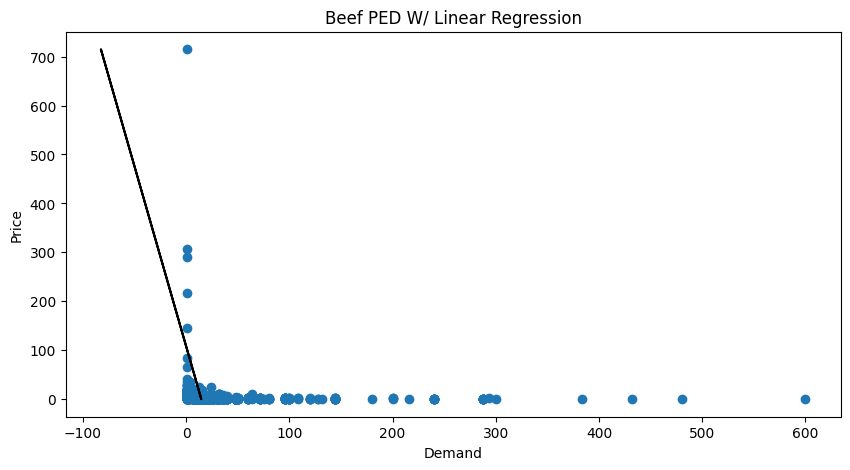

In [49]:
#Import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#Create our scatterplot
fig, ax=plt.subplots(figsize=(10,5))
plt.scatter(y, X)
plt.plot(lr.predict(X),X,color='k')
ax.set_title("Beef PED W/ Linear Regression")
ax.set_xlabel('Demand')
ax.set_ylabel('Price')
fig.show